mario: (64, 64, 64) 524.3KB
3.109537785888968 -3.1097520153134846
1.5707963267948966


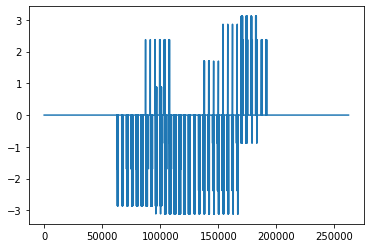

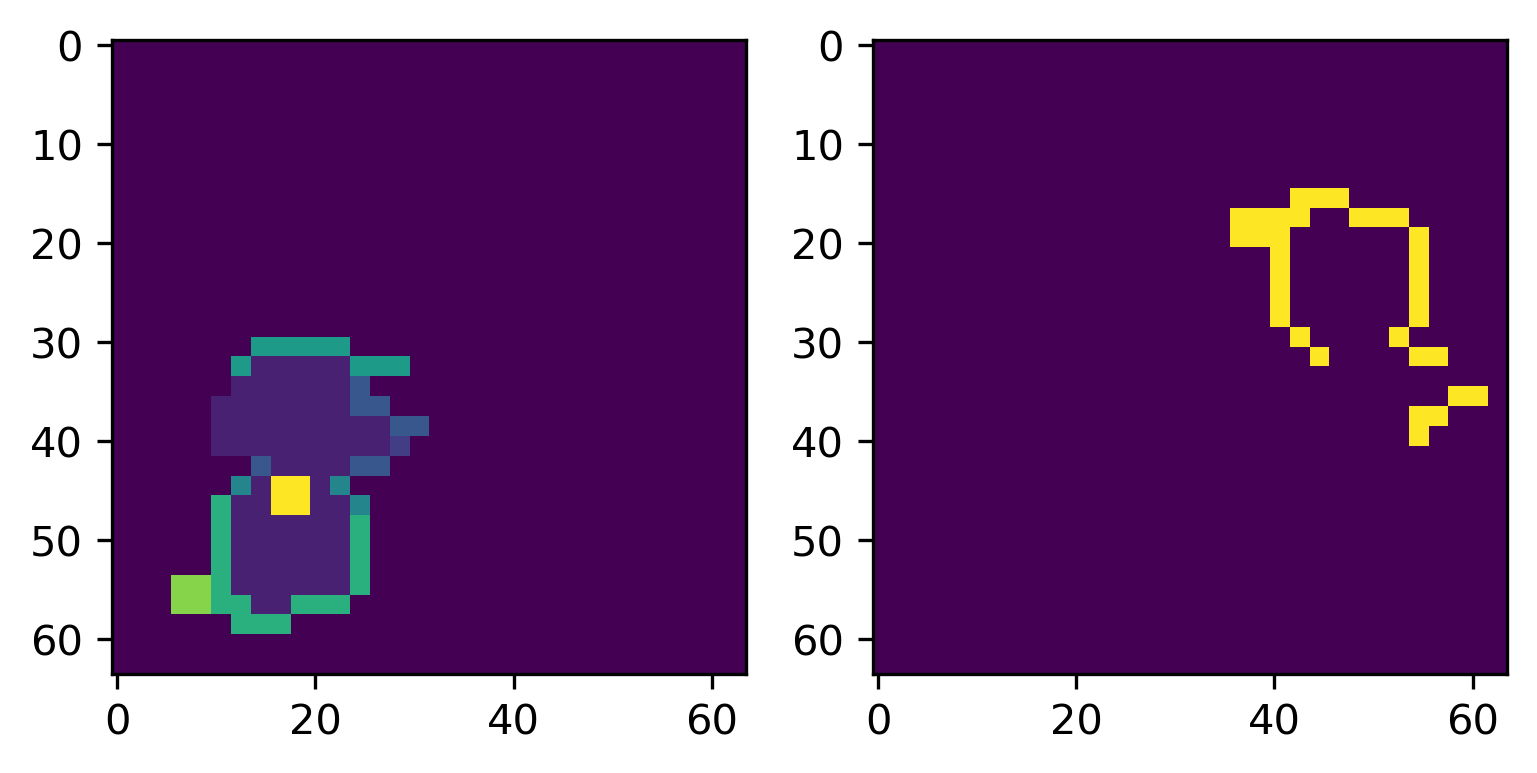

In [171]:
import matplotlib.pyplot as plt
import sscPhantom
import numpy as np
from sscRadon import radon

N = 64
Z=0.5
shift = 15
noise = False
path_tomo = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/proc/recons/phantom_complex/object_phantom_complex.npy"
path_phantom = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/proc/recons/phantom_complex/phantom_complex.npy"

mario = sscPhantom.mario.createMario(shape=N, noise=noise, zoom=Z)
phase = mario/mario.max()
phase = phase - np.min(phase)
phase = np.pi*phase/np.max(phase) - np.pi/2 # rescale from 0 to 2pi
phase = 10*phase
phase = np.flip(phase,axis=0)

phase = np.pi*np.sin(phase)
plt.figure()
plt.plot(phase.flatten())

print(phase.max(),phase.min())

phase = np.roll(phase,shift,axis=1)
# phase = np.roll(phase,5,axis=2)

magnitude = mario/mario.max()
magnitude = np.roll(magnitude,shift-4,axis=0)
magnitude = np.roll(magnitude,-shift,axis=1)

phantom = magnitude*np.exp(-1j*phase)
# phantom = magnitude+phase

figure, ax = plt.subplots(1,2,dpi=300)
ax[0].imshow(np.abs(phantom[:,:,phantom.shape[0]//2]))
ax[1].imshow(np.angle(phantom[:,:,phantom.shape[0]//2]))

np.save(path_phantom,phantom)
print(np.pi/2)

In [172]:
gpus    = [5]
nangles = 2*N

tomogram_nonoise = np.swapaxes( radon.radon_gpu_block( np.abs(phantom), nangles, gpus, blocksize=10 ), 0, 1)
noise = np.random.normal(0, phantom.max()/100, tomogram_nonoise.shape)
tomogram_magnitude = tomogram_nonoise + 1 * noise

tomogram_nonoise = np.swapaxes( radon.radon_gpu_block( np.angle(phantom), nangles, gpus, blocksize=10 ), 0, 1)
noise = np.random.normal(0, phantom.max()/100, tomogram_nonoise.shape)
tomogram_phase = tomogram_nonoise + 1 * noise

tomogram = tomogram_magnitude*np.exp(-1j*tomogram_phase)
# tomogram = np.abs(tomogram)
# tomogram = np.angle(tomogram)
# plt.figure(0)
# plt.imshow( tomogram[:,phantom.shape[0]//2,:] )
np.save(path_tomo,tomogram)

tomogram.shape


# temp_tomogram, shiftv    = radon.get_wiggle( tomogram_equalized, "vertical", nproc, ref )
# temp_tomogram, shiftv    = radon.get_wiggle( temp_tomogram, "vertical", nproc, ref )
# updated_tomogram, shifth, cmass = radon.get_wiggle( temp_tomogram, "horizontal", nproc, ref )
# tomogram

(128, 64, 64)

In [173]:
path = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/data/ptycho3d/phantom_complex/positions"

angles = np.linspace(-90,90,tomogram.shape[0])

for i, angle_number in enumerate(range(tomogram.shape[0])): 
    filename = str(angle_number).zfill(4)+f"_phantom_complex_001.txt"
    line = f"Ry: {angles[i]}\tPiezoB2\tPiezoB3\tPiezoB1\t"
    print(line)
    with open(os.path.join(path,filename), 'w') as f:
        f.write(line)

Ry: -90.0	PiezoB2	PiezoB3	PiezoB1	
Ry: -88.58267716535433	PiezoB2	PiezoB3	PiezoB1	
Ry: -87.16535433070867	PiezoB2	PiezoB3	PiezoB1	
Ry: -85.74803149606299	PiezoB2	PiezoB3	PiezoB1	
Ry: -84.33070866141732	PiezoB2	PiezoB3	PiezoB1	
Ry: -82.91338582677166	PiezoB2	PiezoB3	PiezoB1	
Ry: -81.49606299212599	PiezoB2	PiezoB3	PiezoB1	
Ry: -80.07874015748031	PiezoB2	PiezoB3	PiezoB1	
Ry: -78.66141732283465	PiezoB2	PiezoB3	PiezoB1	
Ry: -77.24409448818898	PiezoB2	PiezoB3	PiezoB1	
Ry: -75.8267716535433	PiezoB2	PiezoB3	PiezoB1	
Ry: -74.40944881889764	PiezoB2	PiezoB3	PiezoB1	
Ry: -72.99212598425197	PiezoB2	PiezoB3	PiezoB1	
Ry: -71.5748031496063	PiezoB2	PiezoB3	PiezoB1	
Ry: -70.15748031496062	PiezoB2	PiezoB3	PiezoB1	
Ry: -68.74015748031496	PiezoB2	PiezoB3	PiezoB1	
Ry: -67.32283464566929	PiezoB2	PiezoB3	PiezoB1	
Ry: -65.90551181102362	PiezoB2	PiezoB3	PiezoB1	
Ry: -64.48818897637796	PiezoB2	PiezoB3	PiezoB1	
Ry: -63.07086614173228	PiezoB2	PiezoB3	PiezoB1	
Ry: -61.653543307086615	PiezoB2	PiezoB3	PiezoB1	
Ry: -6